In [1]:
# Imports and matplotlib configuration
import numpy as np
import scipy.signal
from scipy import fftpack
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib import animation, patches
from IPython.display import display, Audio, HTML
##import soundfile as sf

# Actividad 2 INFO183

#### Instrucciones generales

- Complete este cuadernillo jupyter con sus códigos y respuestas
- Se trabajará en grupos de tres personas
- Se entrega un cuadernillo por grupo
- La entrega es a través de correo electrónico a phuijse@inf.uach.cl
- La fecha de entrega es el Lunes 16 de Marzo a las 23:59
- Use las librerías `scipy`, `numpy` y `matplotlib`

### Nombre completo de los integrantes: 
- Franco Bocca
- Enzo Marin
- C

## Parte 0: Responda las siguientes preguntas sobre sistemas LTI

**Q:** ¿Qué es la respuesta al impulso de un sistema? 


La respuesta a un impulso de un sistema es la que se presenta en la salida de este, cuando en la entrada se introduce un impulso. Entendiendose por impulso como el caso límite de un pulso infinítamente corto en el tiempo pero que mantiene su área o integral (por lo cual tiene un pico de amplitud infinitamente alto).

En un sistema LTI se define como la respuesta al sistema a un impulso unitario aplicado en el tiempo $t=0$ cuando  todas las condiciones iníciales son cero.

Si denotamos el impulso como $δ[n]$ y la respuesta al impulso como $h[n]$.

<img src="https://i.imgur.com/0eCGfFP.png" width="650">

Con la respuesta al impulso podemos calcular la salida de un LTI ante cualquier entrada.

**Q:** ¿Qué relación tiene la respuesta al impulso con la respuesta en frecuencia?

La relacion que tiene la respuesta al impulso con la respuesta en frecuencia es que, la respuesta en frecuencia es la transformada de fourirer de la respuesta al impulso.


**Q:** ¿Qué es un sistema LTI y por qué es conveniente estudiarlos en el dominio de la frecuencia?

Un sistema LTI, como su nombre lo dice, es un sistema lineal que permanece invariante en el tiempo, es decir, que los parametros del sistema no van cambiando en el tiempo y por lo tanto, una misma entrada nos dara el mismo retorno en cualquier instante de tiempo.

Conviene estudiarlos en el dominio de la frecuencia ya que los sistemas LTI tienen interpretacion directa del sistema.



**Q:** Escriba  la  ecuación  de  un  sistema  FIR  general  de $L+ 1$ coeficientes


$$
x = y + z
$$

$$
\begin{align}
w[n] &= h[0] x[n] + h[1] x[n-1] + h[2] x[n-2] + \ldots + h[L] x[n-L] \nonumber \\
&= \sum_{j=0}^{L} h[j] x[n-j] \nonumber \\
&= (h* x)[n] \nonumber 
\end{align}
$$

**Q:** Describa paso a paso el método de enventanado para diseñar filtros FIR

Para diseñar un filtro FIR hay que hacer lo siguiente:

- Especificar una respuesta en frecuencia ideal  $H_d[k]$
- Usar la transformada de Fourier inversa para obtener la respuesta al impulso ideal $h_d[n]$
- Truncar la respuesta al impulso ideal usando una ventana tal que $h[n] = h_d[n] w[n]$
- $h[n]$  nos da los coeficientes del filtro FIR y $w[n]$ nos da el largo del filtro

### Enunciado: Análisis y limpieza de un Electrocardiograma

Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) versus tiempo correspondiente a la actividad eléctrica del corazón. El ECG se usa para estudiar el ritmo cardiaco. Un humano normal tiene un ritmo cardiáco entre **60 y 100 latidos por minuto**. 

Considere la siguiente señal de electrocardiograma (ECG) medida en miliVolts [mV] y cuya frecuencia de muestreo es $F_s = 360 Hz$

<IPython.core.display.Javascript object>


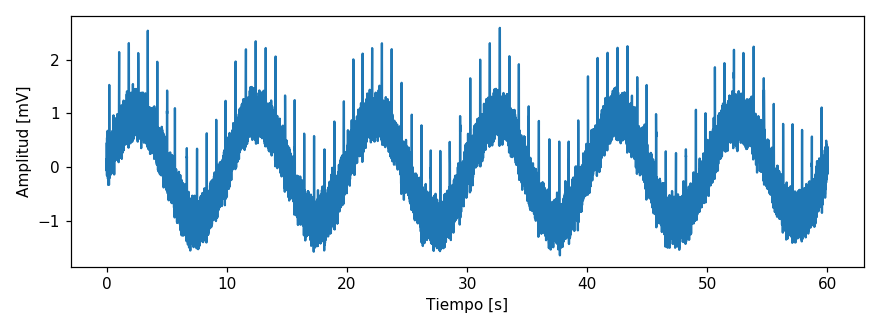

In [1]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
ax.plot(np.arange(len(data))/360, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

Durante el proceso de captura ciertos errores provocaron que la señal se contaminara con

- Un ruido en torno a la frecuencia del sistema eléctrico
- Un ruido de baja frecuencia (tendencia) causado por un desperfecto del sensor
- Un ruido térmico que aparece en todo el rango de frecuencias (blanco)

Esto complica el análisis del médico por lo que el el hospital base de Valdivia los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

## Paso 1: Análisis de un ECG

Antes de diseñar el filtro visualize la señal en el espacio de frecuencias

Dado que la ECG es una **señal no estacionaria** lo más adecuado es estudiar su **espectrograma**: estimador del espectro de magnitud en función del tiempo

Utilize `scipy.signal.spectrogram` para visualizar el espectrograma del ECG

- Especifique la frecuencia de muestreo adecuadamente
- Utilice un largo de ventana (segmento) de 5x360 (5 segundos) y un traslape  (overlap) de 4x360 (4 segundos)
- Mejore la visualización utilizando el logaritmo del espectrograma (sume un pequeño factor 1e-5 para evitar indeficiones)

<IPython.core.display.Javascript object>


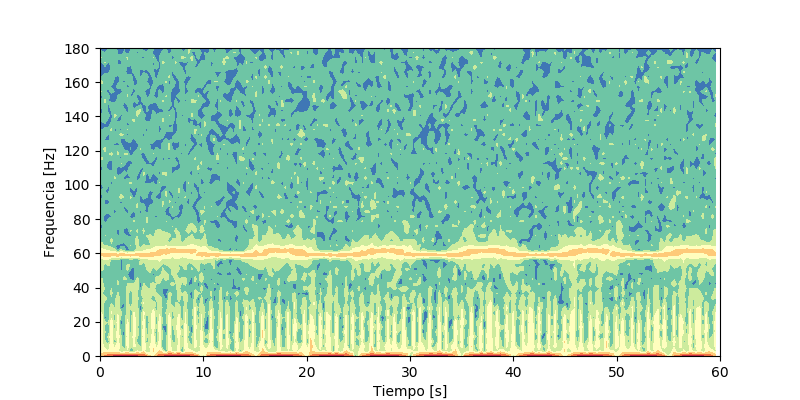

Text(0, 0.5, 'Frequencia [Hz]')

In [3]:
##scipy.signal.spectrogram?

import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)







plt.close('all'); fig, ax = plt.subplots(figsize=(8, 4))
t, dt = np.linspace(0, 60, num=8192, retstep=True); 
s = data;



ax.cla()

freqs, times, Sxx = scipy.signal.spectrogram(s, fs=360.0, nperseg=128, detrend=False,window=('tukey', 0), noverlap=None)
Times, Freqs = np.meshgrid(times, freqs);

ax.contourf(Times, Freqs, 20*np.log10(Sxx+1e-5), cmap=plt.cm.Spectral_r); 
ax.set_xlim([t[0], t[-1]]);
ax.set_xlabel('Tiempo [s]'); ax.set_ylabel('Frequencia [Hz]')

#### Considerando el ritmo cardiaco de un ser humano normal y estudiando el espectrograma obtenido, responda: 

**Q:** ¿En qué rango de frecuencias (Hz) del espectrograma se espera encontrar la señal de ritmo cardiaco? 

El rango de frencuencias en la cual podemos encontrar la señal va desde 0[Hz] hasta los 50[Hz] Aproximadamente por lo que se puede apreciar en el espectrograma. 

**Q:** Identifique y describa el comportamiento espectral de las dos fuentes de ruido que se encuentran en el espectrograma

- Una de las fuentes de ruido corresponde al ruido blanco, que en el espectrograma se aprecia que abarca todo el rango de frecuencias, pero que sin embargo se mantienen en el fondo sin intervenir demasiado en la señal, no tiene un comportamiento definido y se ve bastante aleatorio.

- Luego en el espectrograma se puede apreciar mas ruido alrededor de la frecuencia de 60[Hz], la cual se estima que correspondería al ruido generado por el sistema eléctrico, el cual parece tener un comportamiento sinusoide.

- Finalmente bajo los 10[Hz] o 5[Hz] se puede apreciar nuevamente ruido en el espectrograma, esta vez, por la baja frecuencia a la que se presenta este ruido, debe corresponder al ruido generado por el desperfecto que posee el sensor mencionado previamente en el enunciado, se puede apreciar un comportamiento intermitente en este ruido.

**Q:** Si tuviera que diseñar un filtro para eliminar este ruido, ¿De qué tipo sería? ¿Cuál o cuáles serían sus frecuencias de corte [Hz]?

El tipo de filtro que eligiriamos para eliminar el ruido seria un filtro FIR Pasabandas, ya que nos encontramos en una situación donde hay ruido tanto en los altos como en los bajos, por lo que consideramos aplicar este tipo de filtro es mejor que diseñar dos filtros uno para rechazar los altos y otros los bajos.
Las frecuencia de corte en los bajos seria de 5[Hz] y en los altos unos 50[Hz].

También al momento de construir el filtro pasabandas podriamos combinarlo con un filtro pasa altos (HPF) para que elimine la tendencia generada por el desperfecto en el sensor en caso de que quede rastro de ella al momento de aplicar el filtro pasabandas.

Cabe destacar que estos filtros no podrian eliminar del todo al ruido blanco restante que se logre colar en nuestra banda filtrada, habria que hacer algo al respecto.

**Q:** ¿Es posible eliminar completamente el ruido blanco con un filtro en frecuencia? ¿Por qué?

No es posible eliminarlo completamente, ya que el ruido blanco una de sus características es que invade todas las frecuencias y al trabajar filtrando en frecuencias la unica forma de eliminarlo seria filtrando igualmente todas las frecuencias, pero eso significa que la señal también se eliminaria, lo cual no es factible.

## Paso 2: Filtrado de un ECG

Diseñe un filtro para eliminar el ruido encontrado en el punto anterior considerando el tipo de filtro y la/las frecuencia/s de corte que especificó en el paso anterior

Obtenga la respuesta al impulso del filtro con la función `scipy.signal.firwin`. Utilice las ventanas `boxcar` (rectangular) y `hamming`. Consideré un número de coeficientes (`ntaps`) de 500 y 1000. Esto corresponde a 4 filtros. 

- Muestre en un gráfico la magnitud de la respuesta en frecuencia de los 4 filtros (use `scipy.signal.freqz`). Destaque las diferencias y semejanzas entre las respuestas en frecuencia contrastando con la teoría.

Filtre la señal convolucionando con la respuesta al impulso obtenida. Puede usar `scipy.signal.convolve` con `mode="same"`

- Para cada filtro: Grafique la señal filtrada y su espectrograma. Discuta sobre la efectividad del filtro
- Mida el tiempo que demora convolucionar la señal con cada filtro y construya una tabla (ver ejemplo) ¿Cuál es el filtro más eficiente? ¿Cuál es el menos eficiente?

<IPython.core.display.Javascript object>


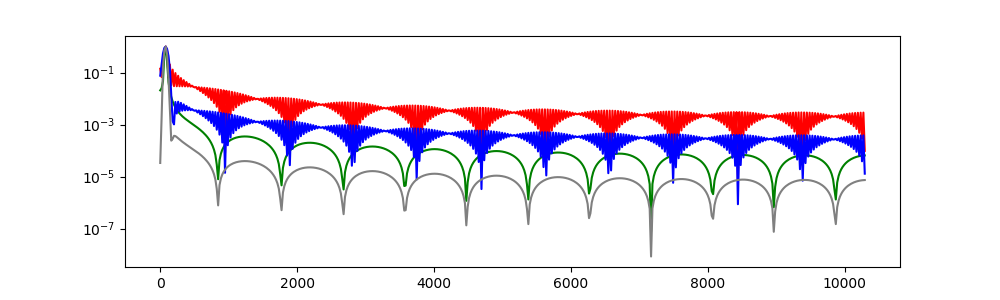

In [7]:
from scipy import signal
from scipy.fftpack import*
import matplotlib.pylab as plt
import pickle

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)
    
b1 = signal.firwin(numtaps=500+1, cutoff=[1, 1.7], pass_zero=False, window='boxcar', fs=360);
b2 = signal.firwin(numtaps=1000+1, cutoff=[1, 1.7], pass_zero=False, window='boxcar', fs=360);
b3 = signal.firwin(numtaps=500+1, cutoff=[1, 1.7], pass_zero=False, window='hamming', fs=360);
b4 = signal.firwin(numtaps=1000+1, cutoff=[1, 1.7], pass_zero=False, window='hamming', fs=360);
    
w1,h1 = signal.freqz(b1, fs = 360)
w2,h2 = signal.freqz(b2, fs = 360)
w3,h3 = signal.freqz(b3, fs = 360)
w4,h4 = signal.freqz(b4, fs = 360)

fig,ax1 = plt.subplots(figsize=(10,3))
ax1.semilogy(180*w1/np.pi,np.abs(h1), 'red')
ax1.semilogy(180*w3/np.pi,np.abs(h2), 'green')
ax1.semilogy(180*w2/np.pi,np.abs(h3), 'blue')
ax1.semilogy(180*w4/np.pi,np.abs(h4), 'gray')

In [ ]:
scipy.signal.freqz?

In [ ]:
scipy.signal.firwin?

In [ ]:
scipy.signal.convolve?

In [ ]:
def ejemplo(x, y):
    return x**y

%timeit -n1 -r3 ejemplo(10, 10)

Supongamos ahora que el hospital gasta muchisimo dinero en un nuevo sensor de mejor calidad. Se mide el ECG del mismo paciente usando el sensor nuevo.

Use esta nueva señal para medir la calidad de sus filtros. Evalue usando la métrica de error cuadrático medio
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (x_i - y_i)^2
$$

- Calcule el error cuadrático medio entre la señal limpia y las señales filtradas. ¿Cuál filtro tiene el mejor rendimiento en términos de MSE? ¿Cuál filtro tiene el peor rendimiento?
- Muestre en un gráfico los primeros cinco segundos de la señal limpia, la señal sucia y la mejor señal filtrada en términos de MSE. Comente respecto a este resultado

In [ ]:
import pickle
with open("ECG_nueva.pkl", "rb") as f:
    data_clean = pickle.load(f)